In [1]:
import json
with open("/Users/lukaandrensek/Documents/app/data/rtv.json", "r", encoding="utf-8") as file:
    rtv = json.load(file)

In [5]:
rtv["slovenija"]

{'2024-09-15': [{'author': 'A. K. K.',
   'time': '8.56',
   'content': 'Veter podiral drevesa\n\nV noči na nedeljo je težave povzročal predvsem močan veter, ki je ponekod podiral drevesa. Regijski centri Uprave RS za zaščito in reševanje so našteli 26 dogodkov, največ na območju Celja, Kranja, Maribora, Murske Sobote in Slovenj Gradca.\n\nMočan veter je podiral drevesa na cestišča, v treh primerih pa so padla na stanovanjska objekta in hlev. Posredovalo je 21 gasilskih enot ter druge službe, ki so podrta drevesa odstranjevale in občanom nudile pomoč pri zaščiti poškodovanega ostrešja, so navedli.\n\nO vetrolomu so poročali na območjih občin Dobrna, Gornji Grad, Laško, Luče, Mozirje, Solčava in Velenje ter na območju Podgorja. Zgodil se je tudi na regionalni cesti v Podklancu ter na regionalni cesti na Tolstem Vrhu.\n\n\n\nSirena za splošno nevarnost v Topolšici\n\nNa območju Topolšice so dopoldne sprožili sireno za splošno nevarnost. PGD Topolšica je na družbenem omrežju na strani Kra

In [5]:
d = {}
len(d)

0

In [2]:
i = 0 
for r in rtv:
    for d in rtv[r]:
        for article in rtv[r][d]:
            eng = article["english_content"]
            if eng == "Content was too long to translate.":
                i += 1
i

9

In [2]:
def shorten(dic):
    new = {}
    for r in dic:
        new[r] = {}
        for d in dic[r]:
            
            arts = []
            for art in dic[r][d]:
                art["content"] = "..."
                art["english_content"] = "..."
                arts.append(art)
            new[r][d] = arts[:(min(2, len(arts)))]
    return new          

In [7]:
new = shorten(rtv)

In [3]:
i = 0 
for r in rtv:
    for d in rtv[r]:
        i += len(rtv[r][d])
print(i)

300


In [11]:
al = []
for r in rtv:
    for d in rtv[r]:
        al.extend(rtv[r][d])
len(al)

2097

In [12]:
titles = [art["title"] for art in al]
len(set(titles))

2059

In [4]:
dat = "2024-09-19"
import sys
path = "/Users/lukaandrensek/Documents/app/backend/rtv/translation"
sys.path.append(path)
from slo_to_eng import english

In [6]:
r = "slovenija"
article = rtv[r][dat][1]

In [10]:
import multiprocessing

def translate_worker(content, return_dict):
    return_dict['result'] = english(content)

def translate_with_timeout(content, timeout=3):
    manager = multiprocessing.Manager()
    return_dict = manager.dict()
    process = multiprocessing.Process(target=translate_worker, args=(content, return_dict))
    
    process.start()
    process.join(timeout)
    
    if process.is_alive():
        process.terminate()  # Stop the function if it's still running
        print("Too long...")
    else:
        return return_dict.get('result')

if __name__ == "__main__":
    content = article["content"]
    content_length = len(content.split())

    translation = translate_with_timeout(content)


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'translate_worker' on <module '__main__' (built-in)>


In [13]:
data = []
for r in rtv:
    for d in rtv[r]:
        for article in rtv[r][d]:
            data.append(len(article["content"].split()))

<Axes: >

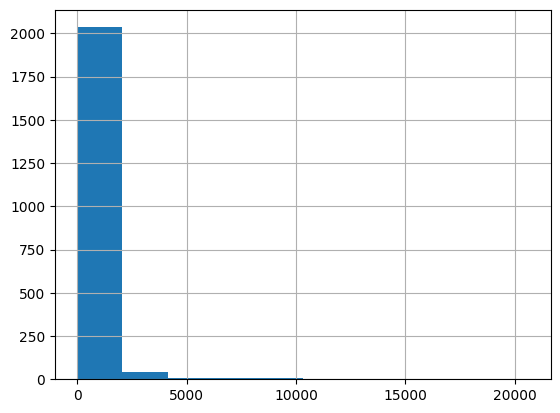

In [15]:
import pandas as pd
s = pd.Series(data)
s.hist()